# ✅ امروز: بررسی کامل tuple در پایتون (به سبک حرفه‌ای)

## 🧱 بخش ۱: تعریف tuple

In [1]:
my_tuple = (1,2,3)
empty_tuple = ()
singleton = (42,)
t = tuple(i for i in range(1,5))

(1, 2, 3, 4)
[1, 2, 3, 4]


## 🔧 (خیلی محدود) tuple متدهای موجود برای  


```
tuple.count(x)
tuple.index(x, start=0, end=len(tuple))
```



In [ ]:
t = (1, 2, 3, 2, 4, 2)
print(t.count(2))
print(t.index(2))         # ➤ 1 (اولین occurrence)
print(t.index(2, 2))      # ➤ 3 (شروع جستجو از ایندکس 2)
print(t.index(2, 4, 6))   # ➤ 5 (بین ایندکس 4 تا 5 فقط 1 occurrence)
# print(t.index(5))  # ➤ ValueError: tuple.index(x): x not in tuple


3
1
3
5


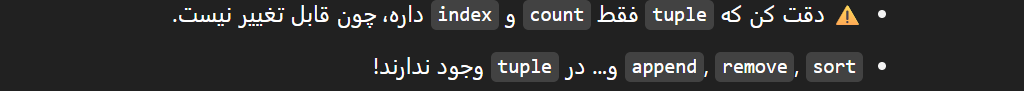

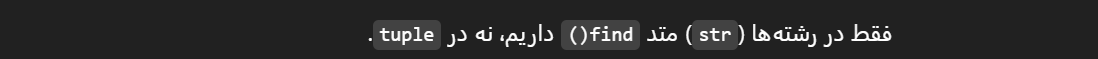

## 🧠سریع‌تره؟ tuple پشت‌پرده: چرا  

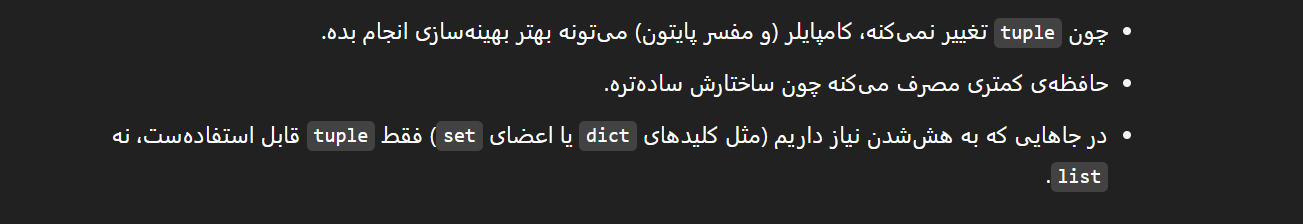

## ✅ CPython در tuple بررسی دقیق حجم اشغالی حافظه   

In [11]:
import sys
x = ()
y = 0,
z = 0,1
n = tuple(i for i in range(100))
print(sys.getsizeof(x))
print(sys.getsizeof(y))
print(sys.getsizeof(z))
print(sys.getsizeof(n)) # 40 + 100*8
print(sys.getsizeof(n) + sum(sys.getsizeof(x) for x in n)) # 840 + 100*28

40
48
56
840
3640


In [17]:
# la versione molto basilare che non monitora esistenza degli oggetti!
col_size = 0
def total_size(x)->int:
  global col_size
  col_size += sys.getsizeof(x)
  if type(x) in (tuple, list, set):
    for el in x:
      total_size(el)
  return col_size
n = tuple(i for i in range(100))
total_size(n)

3640

In [ ]:
# chatgpt version:
import sys
def total_size(obj, seen=None):
    if seen is None:
        seen = set()
    obj_id = id(obj)
    if obj_id in seen:
        return 0
    seen.add(obj_id)
    size = sys.getsizeof(obj)
    if isinstance(obj, (tuple, list, set)):
        size += sum(total_size(x, seen) for x in obj)
    elif isinstance(obj, dict):
        size += sum(total_size(k, seen) + total_size(v, seen) for k, v in obj.items())
    return size
n1 = tuple(i for i in range(100))
n2 = (1,2,1,(1,2), (3,2), (3,2))
print(total_size(n1))
print(total_size(n2))

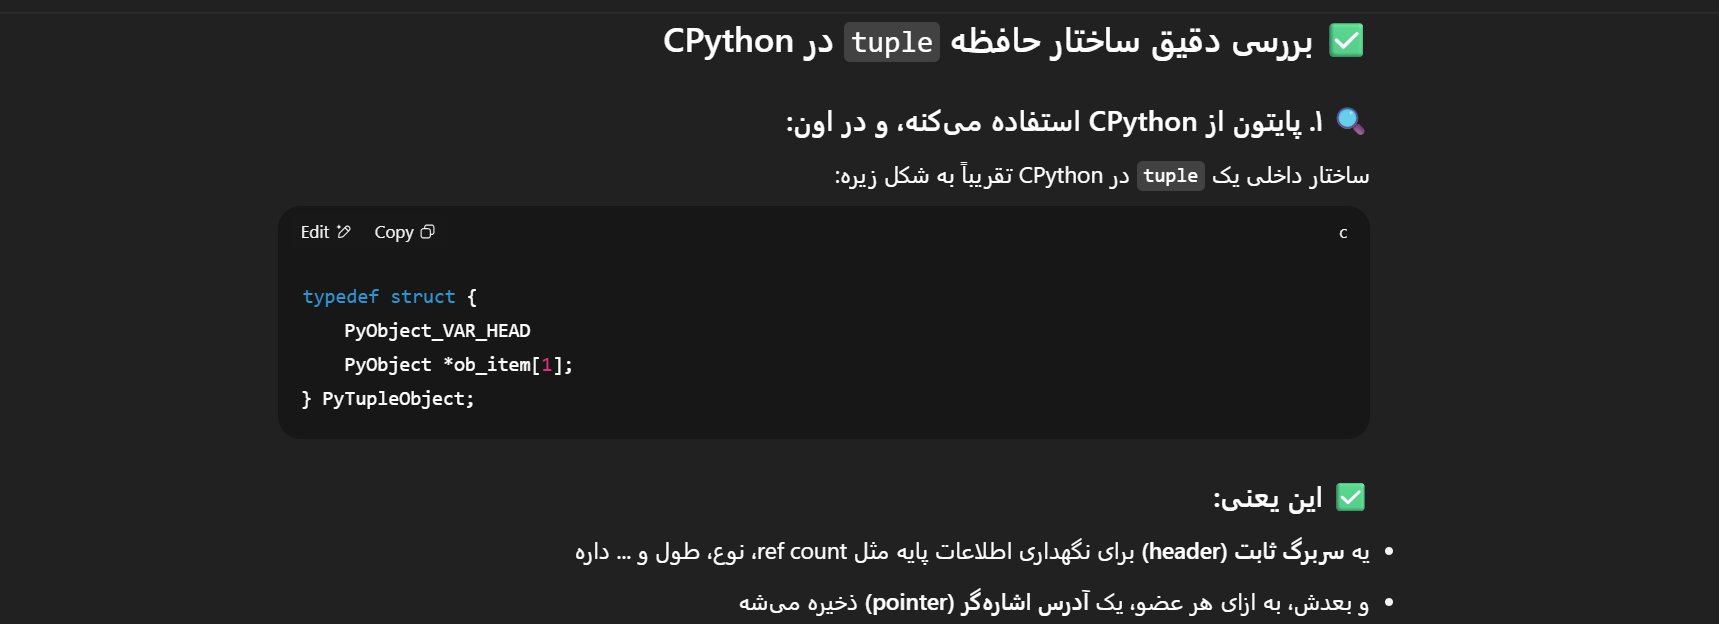

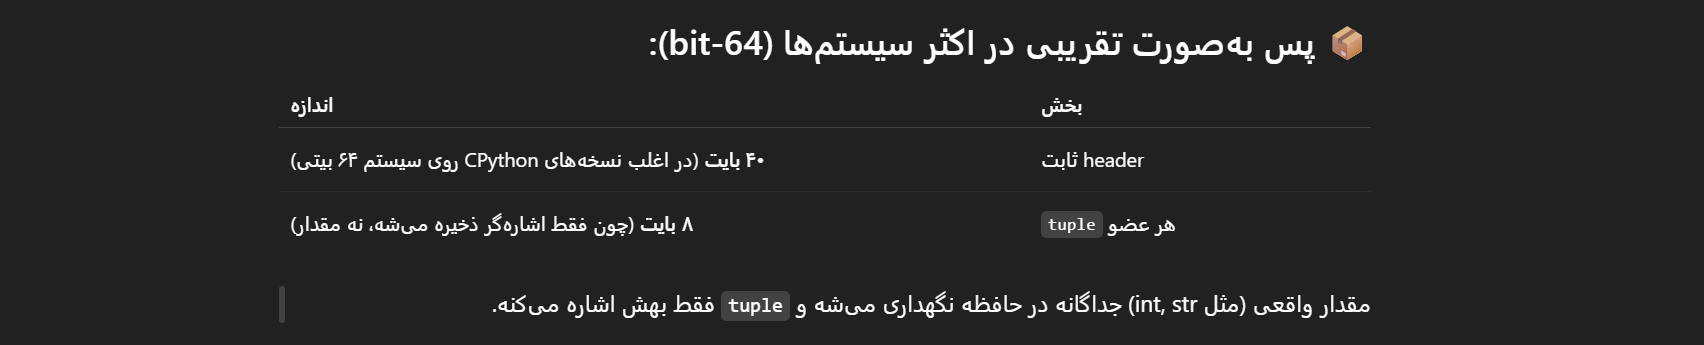

## 💡 tuple مثال‌های واقعی برای استفاده از

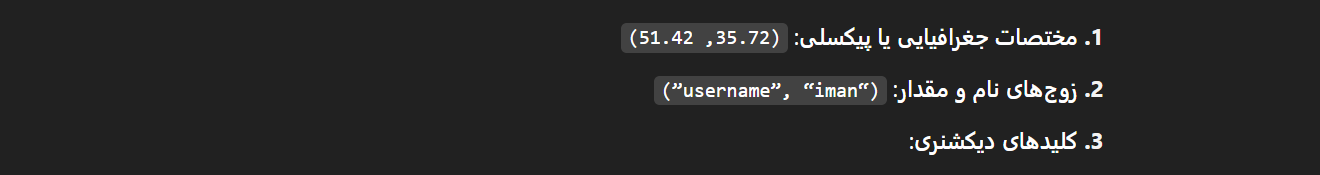

In [ ]:
coordinates = {(35.72, 51.42) : "tehran"}

## 🧪 تمرین سریع



```
# تمرین 1: تابعی بنویس که بررسی کنه آیا تاپل ورودی، فقط عدد مثبت داره یا نه؟
def is_all_positive(t: tuple) -> bool:
    ...

```



In [ ]:
import math
def is_all_positive(t: tuple) -> bool:
  return math.prod(t) > 0
print(is_all_positive((1,2,6,5,3,4)))
print(is_all_positive((1,2,6,5,3,4,0)))
print(is_all_positive((1,2,6,5,3,4,0,-1)))
print(is_all_positive((1,2,6,5,3,4,-5)))
print(is_all_positive((1,2,6,5,3,4,-5, -3))) # XXXX

True
False
False
False
True


In [ ]:
def is_all_positive(t: tuple) -> bool:
  for el in t:
    if not (isinstance(el,(int,float))) or el <= 0:
      return False
  return True

print(is_all_positive((1,2,6,5,3,4)))
print(is_all_positive((1,2,6,5,3,4,0)))
print(is_all_positive((1,2,6,5,3,4,0,-1)))
print(is_all_positive((1,2,6,5,3,4,-5)))
print(is_all_positive((1,2,6,5,3,4,-5, -3)))
print(is_all_positive((1,2,6,5,3,True))) # XXXX

True
False
False
False
False
True


In [ ]:
def is_all_positive(t: tuple) -> bool:
  for el in t:
    if type(el) not in (int,float) or el <= 0:
      return False
  return True

print(is_all_positive((1,2,6,5,3,4)))
print(is_all_positive((1,2,6,5,3,4,0)))
print(is_all_positive((1,2,6,5,3,4,0,-1)))
print(is_all_positive((1,2,6,5,3,4,-5)))
print(is_all_positive((1,2,6,5,3,4,-5, -3)))
print(is_all_positive((1,2,6,5,3,True)))
print(is_all_positive((1,2,6,5,3,"4")))

True
False
False
False
False
False
False


In [ ]:
def is_all_positive(t: tuple) -> bool:
  return all(type(el) in (int, float) and el > 0 for el in t)

print(is_all_positive((1,2,6,5,3,4)))
print(is_all_positive((1,2,6,5,3,4,0)))
print(is_all_positive((1,2,6,5,3,4,0,-1)))
print(is_all_positive((1,2,6,5,3,4,-5)))
print(is_all_positive((1,2,6,5,3,4,-5, -3)))
print(is_all_positive((1,2,6,5,3,True)))
print(is_all_positive((1,2,6,5,3,"4")))

True
False
False
False
False
False
False


In [ ]:
def is_all_positive(el) -> bool:
  return type(el) in (int, float) and el > 0

print(all(map(is_all_positive, (1,2,6,5,3,4))))
print(all(map(is_all_positive, (1,2,6,5,3,4))))
print(all(map(is_all_positive, (1,2,6,5,3,4,0))))
print(all(map(is_all_positive, (1,2,6,5,3,4,0,-1))))
print(all(map(is_all_positive, (1,2,6,5,3,4,-5))))
print(all(map(is_all_positive, (1,2,6,5,3,4,-5, -3))))
print(all(map(is_all_positive, (1,2,6,5,3,True))))
print(all(map(is_all_positive, (1,2,6,5,3,"4"))))

True
True
False
False
False
False
False
False


### ✅ مقایسه روش‌های بررسی شرط برای همه‌ی اعضا

#### 🔹سنتی for : روش 1  


```
for el in iterable:
    if not condition(el):
        return False
return True

```



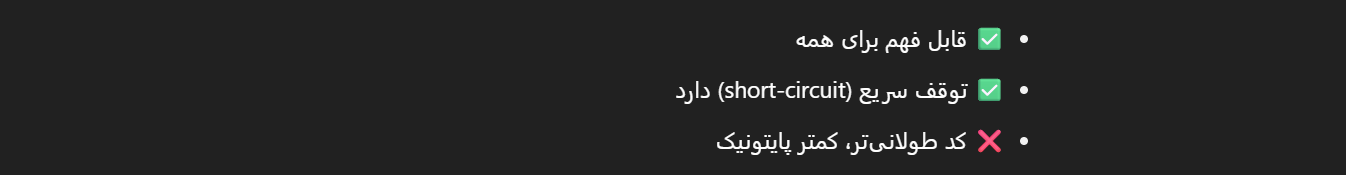

#### generator با all(...) : روش 2  

```
all(condition(el) for el in iterable)
```



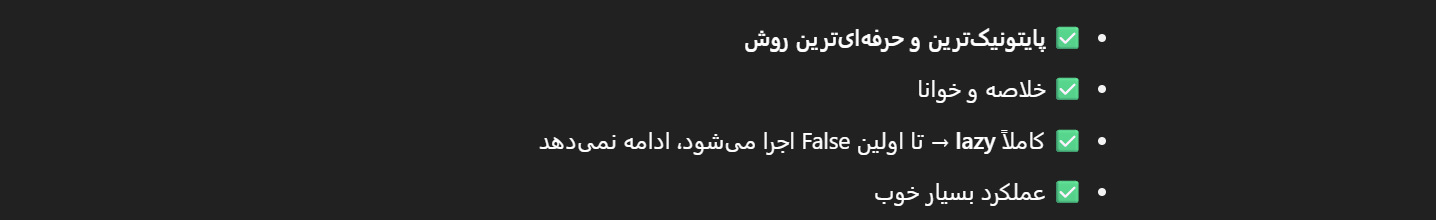

#### 🔹 all(map(...)) : روش 3

```
all(map(condition, iterable))
```



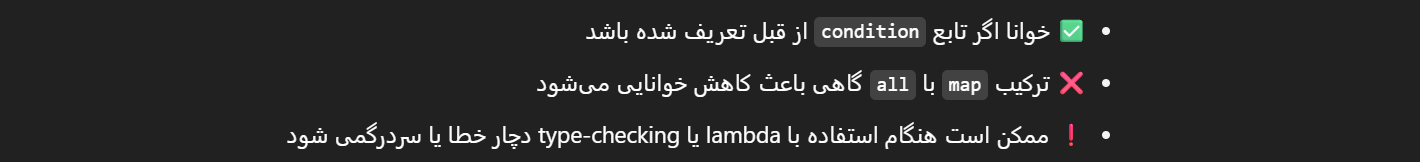

### 📌 Lazy Evaluation درباره‌ی

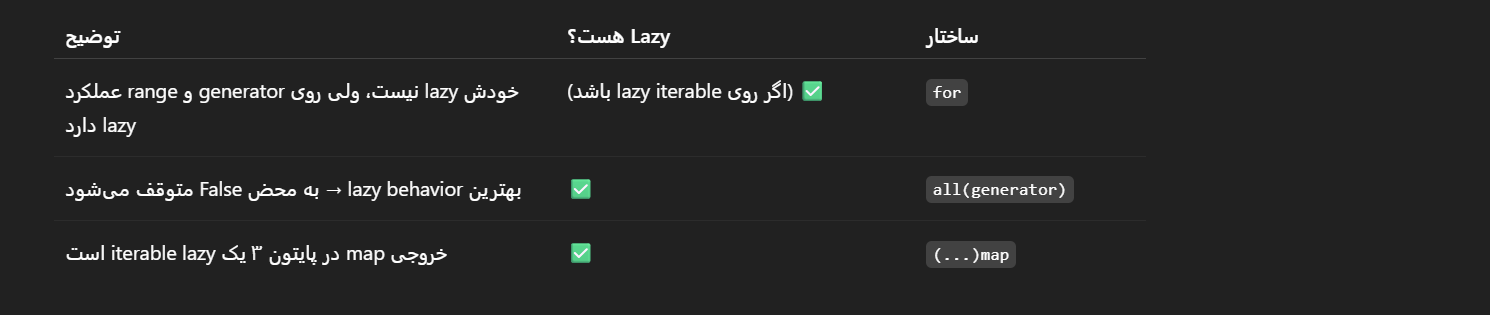